# Day 2: Factor Models

Yesterday we XXXXX. (ADD INTRO BASED ON DAY 1) 

Today, we are going to explore more our embeddings dataset. 



## 1. Loading the datasets 

The first step is to clone the repo with the data. The original dataset available at [Kaggle](https://www.kaggle.com/tunguz/rxrx19a?select=embeddings.csv) has more than 3 GB and 305520 images. So we create a subset with only 15000 images. 

If you are curious to know how we created this subset, you can check our code in the [github repositoty](https://github.com/ai4all-sfu/comp-biology-2020/blob/master/day0-data-preprocessing.ipynb). 

In [1]:
! git clone https://github.com/ai4all-sfu/comp-biology-2020.git

Cloning into 'comp-biology-2020'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 43 (delta 1), reused 10 (delta 1), pack-reused 32
Unpacking objects: 100% (43/43), done.


[link text](https://)To check if the files are available, we use the code below. We should see two folders: 'sample_data' and 'comp-biology-2020'. 

In [2]:
! ls

comp-biology-2020  sample_data


## 2. Analysis

The data now is read to be used, so we can start our analysis! 


In [1]:
#Loading the libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Loading Files we cloned from github 
embeddings = pd.read_pickle('comp-biology-2020/embeddings.pkl', compression = 'xz')
metadata = pd.read_pickle('comp-biology-2020/metadata.pkl', compression = 'xz')

#changing the index
embeddings.set_index('site_id', inplace=True)


With these libraries and the files load, the data is read for our analysis. 


In [3]:
#Checking how big are the datasets: 
print('Dimensions embeddings data: ',embeddings.shape)
print('Dimensions metadata data  : ',metadata.shape)

Dimensions embeddings data:  (16000, 1024)
Dimensions metadata data  :  (16000, 10)


We can also check the format of the metadata file:

In [4]:
metadata.head()

,site_id,well_id,cell_type,experiment,plate,well,site,disease_condition,treatment,treatment_conc
105620,HRCE-1_24_AA20_2,HRCE-1_24_AA20,HRCE,HRCE-1,24,AA20,2,active,Topiramate,0.03
253832,HRCE-1_22_J44_4,HRCE-1_22_J44,HRCE,HRCE-1,22,J44,4,active,Oxyclozanide,0.30
236450,HRCE-1_17_H05_4,HRCE-1_17_H05,HRCE,HRCE-1,17,H05,4,active,norethindrone,0.10
304521,VERO-2_1_S39_4,VERO-2_1_S39,VERO,VERO-2,1,S39,4,active,Indinavir,3.00
129300,HRCE-2_13_F18_2,HRCE-2_13_F18,HRCE,HRCE-2,13,F18,2,active,fludarabine-phosphate,0.30


The last step in the pre-processing is to standardize the dataset. This is a crucial step to avoid that some features have a more considerable influence in the final results only because their scale is larger than other features.


In [5]:
from sklearn.preprocessing import StandardScaler
#standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)
x = StandardScaler().fit_transform(embeddings)

The metadata has the label of interest in the column 'disease_condition', and it will be more explored in the Day 3. 

Today, we are going to work on a very common challenge in Machine Learning: dimensionality reduction. 

The embeddings file has 1025 columns. Such large number of columns increase the complexity of the classification models, cause overfitting, and be very time-consuming. 

In the following analysis, we will explore three different methods to reduce the dimensionality of these datasets, known as *factor models*. 

To see more details about each method, check the slides. 

# Principal Components Analysis (PCA)

In [6]:
#Loading libraries 
from sklearn.decomposition import PCA 
solver = ['auto', 'full', 'arpack', 'randomized']


In [7]:
#Number of features
k1 = 50 
#Model definition
pca = PCA(n_components=k1, svd_solver =solver[0]) 
#Fitting
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

How good are the latent features?

When performing a PCA, a simple way to verify if the latent features are good is to check the variance explained by the principal components.
Below, we will construct a plot to see the value by each component individually and a cumulative value.

In [10]:
#Cumulative value: 
print('Explained Variance:', sum(pca.explained_variance_ratio_)) 


Explained Variance: 0.8831582572011751


Text(0.5, 0, 'Number of Components')

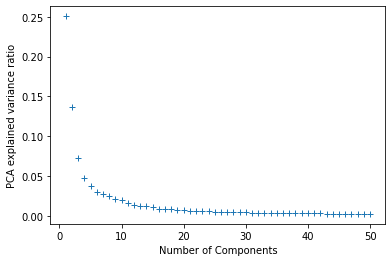

In [11]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax.set_ylabel('PCA explained variance ratio')
ax.set_xlabel('Number of Components')


For k1=50 and solver = 'auto', the PCA results seems good. So we will move foward with these latent features. 




In [8]:
pca.fit(x)
principalComponents = pca.transform(x)

The last step is transform the latent features to a scale between 0 and 1. By doing this, we can improve the performance of the classification models. 

In [9]:
#Creating the function to make the scale
scale01 = MinMaxScaler()
#Scaling the principal componentes 
principalComponents = scale01.fit_transform(principalComponents)

### Activity 1: 

Explore other combinations of K and svd_solvers. Can you find other promissing sets of latent features?

Save your best result to be used in the classification model tomorrow.

In [ ]:
#Model definition and fit: 


In [ ]:
#Evaluation: Plot and percentage of variance explained 

In [13]:
mypca = pca.fit_transform(x) #your new pca
mypca = scale01.fit_transform(mypca) #scale between 0 and 1
np.savez_compressed('mypca.npz',mypca)

After saving, click on the folders on the left side, and you should see your 'mypca.npz' file. If not, click in 'refresh'.

Download your file by clicking on the three dots on the right side of your file's name. 

# Matrix Factorization

This factor model will decompose the original dataset in two smaller matrices. 

For more information, check out the slides! 

In [12]:
from sklearn.decomposition import NMF

#The input data should be between 0 and 1
x01 = scale01.fit_transform(x)

k2 = 60
#model definition and fitting
nmf = NMF(n_components=k2, random_state=0, init = 'nndsvda') 
nmf.fit(x01)
nmf_features = nmf.transform(x01)

To evaluate the matrix factorization, we measure how well it reconstruct the original data. 

In [13]:
print('Original Variables:\n', x01[0:4, 0:4])
reconstruction = np.dot(nmf_features,nmf.components_) 
print('New  Variables:\n', reconstruction[0:4, 0:4])

print('Average Error: ', nmf.reconstruction_err_/(x01.shape[0]*x01.shape[1]))

Original Variables:
 [[0.71246851 0.41726917 0.71866084 0.55895438]
 [0.64361624 0.43084175 0.67708737 0.4425333 ]
 [0.81961755 0.44813878 0.60466719 0.49043446]
 [0.76957227 0.3411122  0.54516069 0.51038555]]
New  Variables:
 [[0.67601886 0.45051203 0.66955125 0.56964729]
 [0.63349026 0.41970248 0.67247967 0.42598533]
 [0.76626879 0.40985348 0.57330341 0.49178042]
 [0.74516775 0.37811176 0.57540675 0.51371837]]
Average Error:  9.335130224368576e-06


The reconstructed matrix looks very close the original variables, and the average error is very low. So we will keep the latent features of this factor model. Before saving, we are going to transform them to be between 0 and 1. 

In [14]:
nmf_features = scale01.fit_transform(nmf_features) 

Activity 2: 

Choose a new value of k2. Run the Matrix Factorization again and save your output for tomorrow's lesson. 

In [ ]:
#model definition and fitting


In [ ]:
#evaluation


In [ ]:
mymf = nmf.transform(x01)
mymf = scale01.fit_transform(mymf) 
np.savez_compressed('mymf.npz',mymf)

#Donwload the file as previously explained.

* Autoenconder 

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

#Don't worry about this class object, we are only going to use it :) 
#Reference: https://rubikscode.net/2018/11/26/3-ways-to-implement-autoencoders-with-tensorflow-and-python/
class Autoencoder(object):
    def __init__(self, inout_dim, encoded_dim):
        learning_rate = 0.1 
        
        # Weights and biases
        hiddel_layer_weights = tf.Variable(tf.random_normal([inout_dim, encoded_dim]))
        hiddel_layer_biases = tf.Variable(tf.random_normal([encoded_dim]))
        output_layer_weights = tf.Variable(tf.random_normal([encoded_dim, inout_dim]))
        output_layer_biases = tf.Variable(tf.random_normal([inout_dim]))
        
        # Neural network
        self._input_layer = tf.placeholder('float', [None, inout_dim])
        self._hidden_layer = tf.nn.sigmoid(tf.add(tf.matmul(self._input_layer, hiddel_layer_weights), hiddel_layer_biases))
        self._output_layer = tf.matmul(self._hidden_layer, output_layer_weights) + output_layer_biases
        self._real_output = tf.placeholder('float', [None, inout_dim])
        
        self._meansq = tf.reduce_mean(tf.square(self._output_layer - self._real_output))
        self._optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(self._meansq)
        self._training = tf.global_variables_initializer()
        self._session = tf.Session()
        
    def train(self, input_train, input_test, batch_size, epochs):
        self._session.run(self._training)
        
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(int(input_train.shape[0]/batch_size)):
                epoch_input = input_train[ i * batch_size : (i + 1) * batch_size ]
                _, c = self._session.run([self._optimizer, self._meansq], feed_dict={self._input_layer: epoch_input, self._real_output: epoch_input})
                epoch_loss += c
                print('Epoch', epoch, '/', epochs, 'loss:',epoch_loss)
        
    def getEncoded(self, item):
        encoded_ = self._session.run(self._hidden_layer, feed_dict={self._input_layer:[item]})
        return encoded_
    
    def getDecoded(self, item):
        decoded_ = self._session.run(self._output_layer, feed_dict={self._input_layer:[item]})
        return decoded_


Instructions for updating:
non-resource variables are not supported in the long term


For this factor model, we need to split the dataset in 2 parts: training and testing set. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x,test_size=0.33, random_state=42)


In [ ]:
#Model definition
autoencodertf = Autoencoder(x.shape[1], 32)

#Model Fitting
autoencodertf.train(x_train, x_test, 100, 50)



Streaming output truncated to the last 5000 lines.
Epoch 3 / 50 loss: 166.9284987449646
Epoch 3 / 50 loss: 172.24457836151123
Epoch 3 / 50 loss: 177.37405729293823
Epoch 3 / 50 loss: 182.56188869476318
Epoch 3 / 50 loss: 187.9050431251526
Epoch 3 / 50 loss: 192.99139642715454
Epoch 3 / 50 loss: 198.31676387786865
Epoch 3 / 50 loss: 203.34944772720337
Epoch 3 / 50 loss: 208.59117317199707
Epoch 3 / 50 loss: 213.979820728302
Epoch 3 / 50 loss: 219.09456205368042
Epoch 3 / 50 loss: 224.29662990570068
Epoch 3 / 50 loss: 229.1841425895691
Epoch 3 / 50 loss: 234.12038946151733
Epoch 3 / 50 loss: 239.1324725151062
Epoch 3 / 50 loss: 244.10117959976196
Epoch 3 / 50 loss: 248.9897918701172
Epoch 3 / 50 loss: 254.0507140159607
Epoch 3 / 50 loss: 258.98323917388916
Epoch 3 / 50 loss: 264.1593279838562
Epoch 3 / 50 loss: 269.132031917572
Epoch 3 / 50 loss: 274.0806288719177
Epoch 3 / 50 loss: 278.87061405181885
Epoch 3 / 50 loss: 283.8801655769348
Epoch 3 / 50 loss: 288.94404125213623
Epoch 3 / 50

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
testing_error = []
training_error = []

for i in range(len(x_test)):
  testing_error.append(mean_squared_error(x_test[i], autoencodertf.getDecoded(x_test[i]).reshape(-1,1)))

for i in range(len(x_train)):
  training_error.append(mean_squared_error(x_train[i],autoencodertf.getDecoded(x_train[i]).reshape(-1,1))) 


In [ ]:
print('Mean Squared Error on Testing set',np.mean(testing_error))
print('Mean Squared Error on Training set',np.mean(training_error))

Mean Squared Error on Testing set 0.8593152017373249
Mean Squared Error on Training set 0.8175428617327041


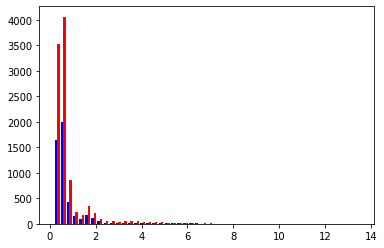

In [ ]:
histogram_data = plt.hist([testing_error, training_error], bins=50, color=['b','r'])

The error in the training and testing set looks similar and low, so there are evidence that our autoenconder is doing a good job. 

In [ ]:
#Latent Variables 
autoenconderlv = []

for i in range(len(x)):
  autoenconderlv.append( autoencodertf.getEncoded(x[i])[0])


In [ ]:
autoenconderlv = np.matrix(autoenconderlv)
print('Autoencoder latent variables shape: ', autoenconderlv.shape)


Autoencoder latent variables shape:  (16000, 32)
